<a href="https://colab.research.google.com/github/DataSayant1st/MachineLearning_and_AI/blob/main/MedianIncome_and_housing_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This linear regression task is to create a predictive model that determines how a person's income determines the type/size of the house they will have

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
##Load the data
housing = fetch_california_housing()

In [ ]:
type(housing)

sklearn.utils._bunch.Bunch

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
housing.target_names

['MedHouseVal']

In [ ]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
housing.data.shape

(20640, 8)

In [ ]:
for count, name in enumerate(housing.feature_names):
    print(name)
    print(housing.data[:, count].min(), housing.data[:, count].max())
    print('')

MedInc
0.4999 15.0001

HouseAge
1.0 52.0

AveRooms
0.8461538461538461 141.9090909090909

AveBedrms
0.3333333333333333 34.06666666666667

Population
3.0 35682.0

AveOccup
0.6923076923076923 1243.3333333333333

Latitude
32.54 41.95

Longitude
-124.35 -114.31



In [ ]:
#Split the data
X = housing.data
y = housing.target

In [ ]:
#Standardising the data

stdscaler = StandardScaler()
X = stdscaler.fit_transform(X)
print(X.min(), X.max())

-2.3859923416733797 119.41910318829312


In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.score(X,y)

0.606232685199805

In [ ]:
#Aim for accuracy closer to 1. Therefore this model performed poorly at 60%

In [ ]:
from sklearn.feature_selection import r_regression

#we are going to correlate between different features in our dataset

In [ ]:
corr_matrix = []

for i in range(8):
    corr_matrix.append(r_regression(X, X[:, i]))

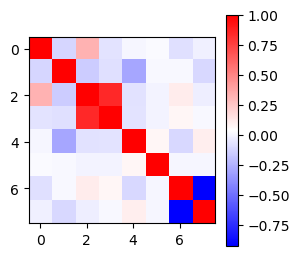

In [ ]:
from matplotlib import figure

plt.figure(figsize = (3,3))
plt.imshow(corr_matrix, cmap = 'bwr')
plt.colorbar()

In [ ]:
#Closer to 0 in the heat map means very low correlation

In [ ]:
model.coef_

array([ 0.8296193 ,  0.11875165, -0.26552688,  0.30569623, -0.004503  ,
       -0.03932627, -0.89988565, -0.870541  ])

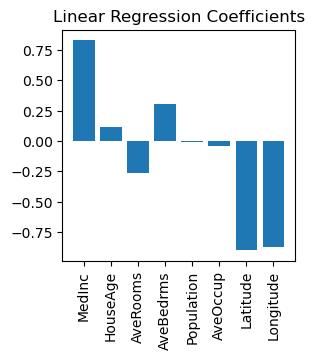

In [ ]:
plt.figure(figsize = (3,3))

plt.bar(range(len(model.coef_)), model.coef_)

plt.xticks(range(len(model.coef_)),
                   housing.feature_names,
                   rotation = 90)

plt.title("Linear Regression Coefficients")
plt.show()

In [ ]:

#new features were engineered in to further asses the predicatability and see how the model would work in other instances

In [ ]:
feature_idx = 7
features_values = np.linspace(min(X[:,feature_idx]),
                             max(X[:, feature_idx]),
                             num = 1000)
other_features = np.random.normal(size = (1000, X.shape[1]-1))

In [ ]:
X_plot = np.column_stack((other_features, features_values))
y_plot = model.predict(X_plot)

<function matplotlib.pyplot.show(close=None, block=None)>

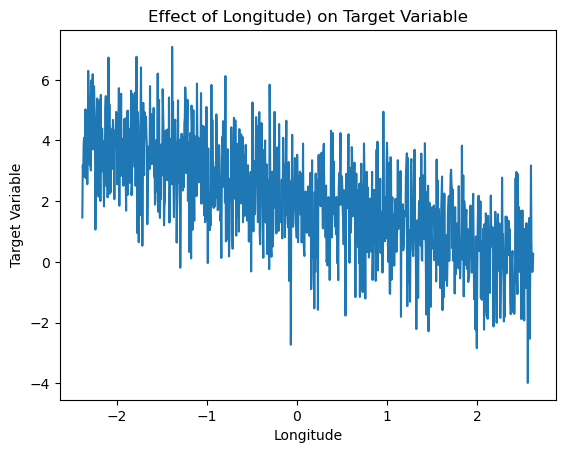

In [ ]:
plt.plot(features_values, y_plot)
plt.xlabel(housing.feature_names[feature_idx])
plt.ylabel("Target Variable")
plt.title(f"Effect of {housing.feature_names[feature_idx]}) on Target Variable")
plt.show

In [ ]:
#generate random data for other features


In [ ]:
num_values = 1000
features_ranges = []

for i in range(X.shape[1]):

    feature_min = np.min(X[:,i])

    feature_max = np.max(X[:,i])

    feature_range = np.linspace(feature_min, feature_max, num = num_values)

    features_ranges.append(feature_range)

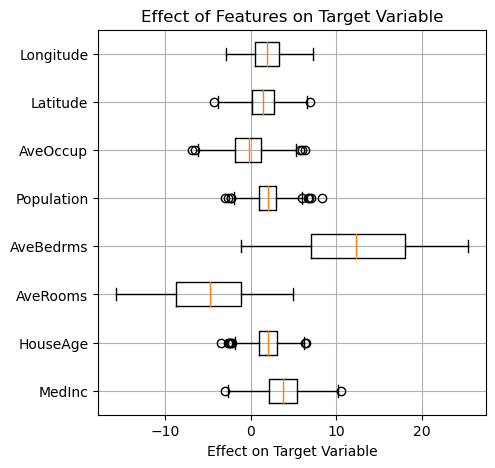

In [ ]:
#calculate the predictions for each feature range

all_predictions = []

for i in range(X.shape[1]):

    mean_value = 0

    feature_values= np.zeros((num_values, X.shape[1]))

    feature_values[:,i] = features_ranges[i]

    other_features = np.random.normal(size=(num_values, X.shape[1]))

    X_plot = feature_values + other_features

    predictions = model.predict(X_plot)

    all_predictions.append(predictions)


#median and interquartile range
prediction_medians = np.median(all_predictions, axis = 1)
prediction_iqrs = np.percentile(all_predictions, 75, axis = 1) - np.percentile(all_predictions, 25, axis =1)

#plot results

fig, ax = plt.subplots(figsize =(5,5))
bp = ax.boxplot(all_predictions, vert = False, widths = 0.5, showfliers = True)
ax.set_yticklabels(housing.feature_names)
ax.set_xlabel("Effect on Target Variable")
ax.set_title("Effect of Features on Target Variable")
plt.grid("on")
plt.show()

In [ ]:
observation_idx = 10

observation = X[observation_idx,:]
prediction = model.predict([observation])[0]

feature_contributions = model.coef_* observation

print("Feature Values:")
print(list(zip(housing.feature_names, observation)))

print("Feature contributions to Prediction:")

print(list(zip(housing.feature_names, feature_contributions)))

print("\n Prediction:")
print(prediction)

Feature Values:
[('MedInc', -0.35139464349045896), ('HouseAge', 1.8561815225324747), ('AveRooms', 0.019648332203345123), ('AveBedrms', -0.03602697199409437), ('Population', -0.4551933544236139), ('AveOccup', -0.07769971749617115), ('Latitude', 1.0385026859502), ('Longitude', -1.3428091431408746)]
Feature contributions to Prediction:
[('MedInc', -0.29152377966043164), ('HouseAge', 0.2204246207501991), ('AveRooms', -0.005217160337463692), ('AveBedrms', -0.011013309509860118), ('Population', 0.002049736272462658), ('AveOccup', 0.00305563983438116), ('Latitude', -0.9345336691575183), ('Longitude', 1.1689704174154398)]

 Prediction:
2.220770664696356


In [ ]:
observation

array([-0.35139464,  1.85618152,  0.01964833, -0.03602697, -0.45519335,
       -0.07769972,  1.03850269, -1.34280914])

In [ ]:
stdscaler.inverse_transform(observation.reshape(1,-1))
#the purpose of std scaler is, which is a preprocessing technique, is to standardize the features of a dataset so that they have a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization.

array([[-0.35139464,  1.85618152,  0.01964833, -0.03602697, -0.45519335,
        -0.07769972,  1.03850269, -1.34280914]])

In [ ]:
#installing SHAP
#Visualisation

In [ ]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap
shap.initjs()

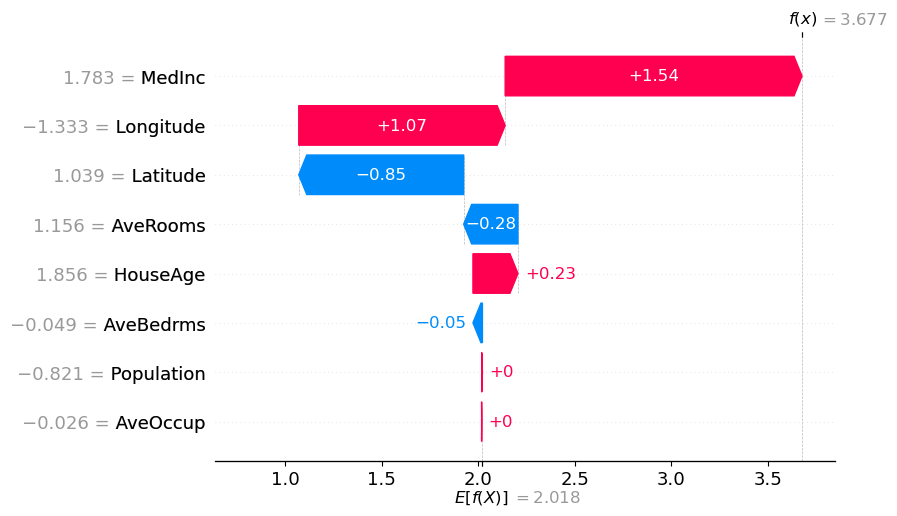

In [ ]:
model = LinearRegression().fit(X,y)

explainer = shap.Explainer(model, X, feature_names = housing.feature_names)

shap_values = explainer(X)

shap.plots.waterfall(shap_values[2])


In [ ]:
#another way to present the same graph
shap.plots.force(shap_values[2])

In [ ]:
shap_values = explainer(X[:100,:])

shap.plots.force(shap_values)

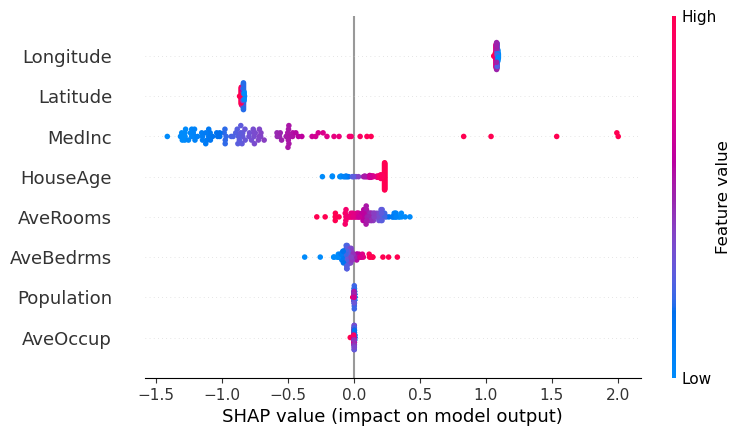

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 279.3 kB/s eta 0:00:01
     ---------------- ------------------- 122.9/275.7 kB 654.9 kB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=406fd827b5ac1bf0aab4020ddddbe1ee21a12c2d02dd02e9fc872bee01f32c3d
  Stored in directory: c:\users\we\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated pa

In [ ]:
#lime

from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import cross_validate, train_test_split
from IPython.display import display, HTML

In [ ]:
# explainer = LimeTabularExplainer(X, mode = 'regression')

In [ ]:
#Splitting the data
X = housing.data
y = housing.target

stdscaler = StandardScaler()
X = stdscaler.fit_transform(X)
print(X.min(), X.max())

-2.3859923416733877 119.41910318829312


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 51)

X_valid = X_train[int(X_train.shape[0]*0.7):]
y_valid = y_train[int(y_train.shape[0]*0.7):]

X_test = X_test[int(X_test.shape[0]*0.7):]
y_test = y_test[int(y_test.shape[0]*0.7):]

# The significance of changing or setting the random state is that

In [ ]:
#Decreasing alpha decreases the learning process
#Increasing layers enables the model to establish more patterns hence better learning. FDiring as many neurons as possible
model = MLPRegressor(learning_rate = 'constant', alpha = 0.001, hidden_layer_sizes = (64),activation = 'relu', verbose = False)

In [ ]:
model.fit(X_train, y_train)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


MLPRegressor(alpha=0.001, hidden_layer_sizes=64)

In [ ]:
R2 = model.score(X_test, y_test)
print(R2)

0.7751198921080159


In [ ]:
cv_results = cross_validate(model,X,y, cv = 5)

In [ ]:
display(JSON(cv_results))

NameError: name 'JSON' is not defined

R2 = model.score(X_test, y_test)

n = lens(y_valid)
p = len(housing.feature_names)

R2 = norm = 1-(1-R2)*(n-1)/(n - p - 1)

print(R2)
print(R2_norm)

In [ ]:
# Interpreting R2
# Eg; A linear relationship of 80% means that the model explains the relationship to at least that extent

# It's L-1 because when eg we have 3 categories, it means ONE is missing
# Red, Blue and Green for example can be represented by the vector [0,0,1] , meaning that the colour in question here is Green based on their order

# R2 tells you how much of the variance can be explained by the linear model
# SSE tells u about the error


#t-statistic is used to measure the importance of a feature in a linear regression model. It has already been weighed against its standard error

# Standardisation vs Normalisation
# Performed after splitting data into train and test sets; However; Standardisaton rescales features to have a mean of 0 and a standard deviation of 1 (resulting in a standard normal distribution), scaling more generally refers to any transformation that adjusts the scale of the features without necessarily standardizing them.
#